In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import pylab as pl
from sklearn.linear_model import LinearRegression

In [2]:
#get Data
# !wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
df = pd.read_csv('./FuelConsumption.csv')

In [3]:
df.head(8)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255


In [4]:
df.isnull().any().any()

False

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


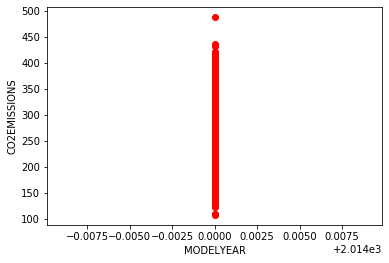

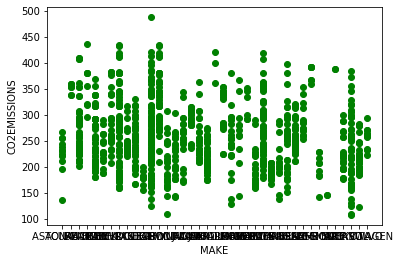

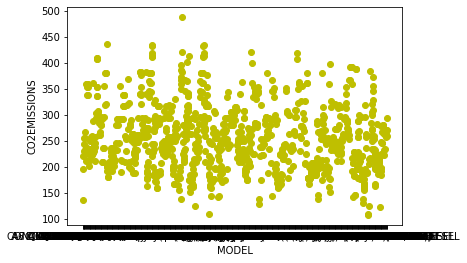

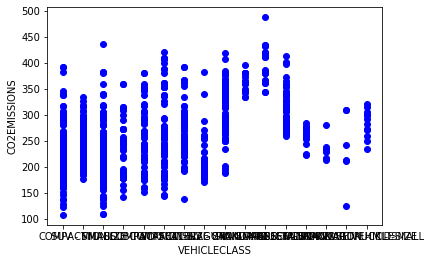

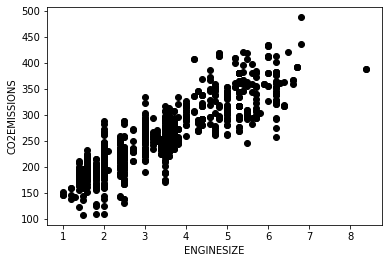

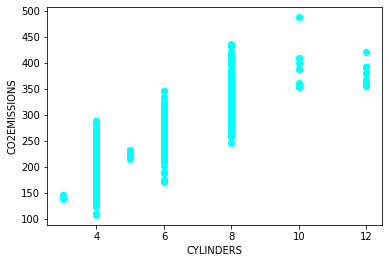

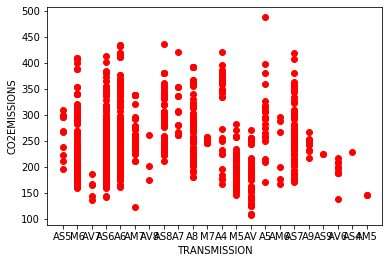

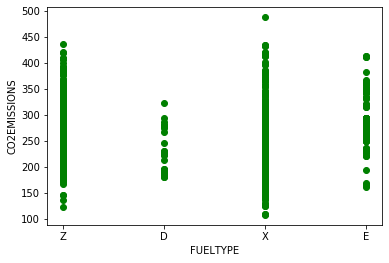

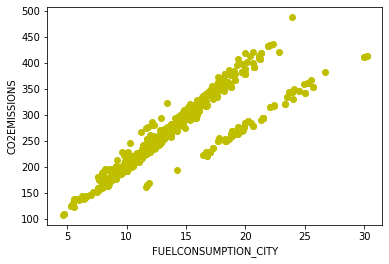

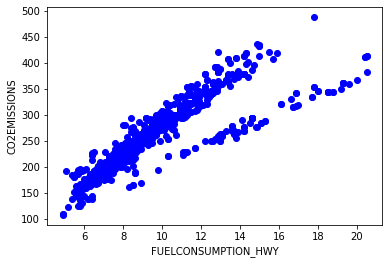

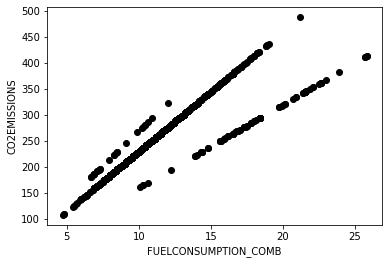

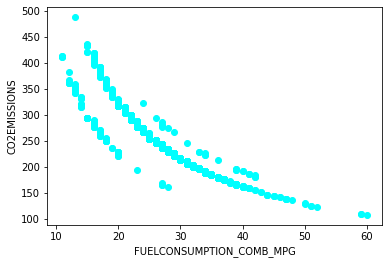

In [6]:
l = list(df.columns)
c=['r','g','y','b','black','cyan']
target = df[l[len(l)-1]] #Co2 Emissions
# All(except Co2emissions) vs CO2 emisisons
k=0
for i in range(0,len(l)-1):
    current=df[l[i]]
    try:
        clr = c[k]
    except:
        k=0
        clr=c[k]
    plt.scatter(current,target,color=clr)
    plt.xlabel(l[i])
    plt.ylabel('CO2EMISSIONS')
    plt.show()
    k=k+1

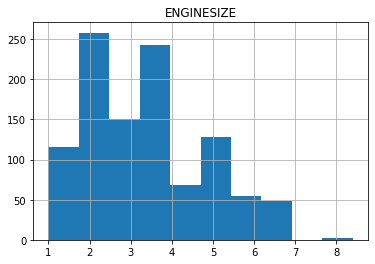

In [7]:
cf = df[['ENGINESIZE']]
cf.hist()
plt.show()

In [8]:
mask = np.random.rand(len(df))>0.8
train = df[mask]
test = df[~mask]

In [9]:
from sklearn.preprocessing import PolynomialFeatures

Xtrain = np.asanyarray(train[['ENGINESIZE']])
Ytrain = np.asanyarray(train[['CO2EMISSIONS']])
poly = PolynomialFeatures(degree=2)
Xtrain = poly.fit_transform(Xtrain)
Xtrain

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  4.7 , 22.09],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  6.8 , 46.24],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  1.4 ,  1.96],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  3.6 , 12.96],
       [ 1.  ,  3.6 , 12.96],
       [ 1.  ,  3.6 , 12.96],
       [ 1.  ,  6.2 , 38.44],
       [ 1

In [10]:
regr = LinearRegression()
regr.fit(Xtrain,Ytrain)
print("Intercept: " ,regr.intercept_)
print("Coefficient: ",regr.coef_)

Intercept:  [100.52607501]
Coefficient:  [[ 0.         54.01273638 -2.09066431]]


54.012736379576175
-2.0906643099589304


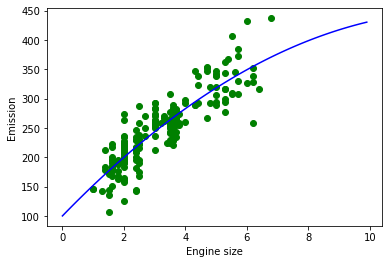

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='g')
XX = np.arange(0.0, 10.0, 0.1)
print(regr.coef_[0][1])
print(regr.coef_[0][2])
yy = regr.intercept_+ regr.coef_[0][1]*XX+ regr.coef_[0][2]*np.power(XX, 2)

plt.plot(XX, yy, color='b' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [12]:
Xtest = np.asanyarray(test[['ENGINESIZE']])
Ytest = np.asanyarray(test[['CO2EMISSIONS']])
Xtest = poly.fit_transform(Xtest)
ypred = regr.predict(Xtest)

In [13]:
from sklearn.metrics import r2_score
print("MAE %.2f" %np.mean(np.absolute(ypred-Ytest)))
print("MSE %.2f" %np.mean((ypred-Ytest)**2))
print("Rsquare %.2f" %r2_score(y_true=Ytest,y_pred=ypred))

MAE 23.70
MSE 979.69
Rsquare 0.76
